<a href="https://colab.research.google.com/github/deepesh2004/CODESOFT/blob/main/Pets_Faces_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os


In [2]:
images_fp='./images'

In [3]:
image_names=[os.path.basename(file) for file in glob.glob(os.path.join(images_fp, '*.jpg'))]

In [4]:
len(image_names)

0

In [5]:
labels=[''.join(name.split(_)[::-1]) for name in image_names]

In [6]:
def label_encode(label):
  if label == 'Abyssinian': return 0
  elif label == 'Bengal': return 1
  elif label == 'Birman': return 2
  elif label == 'Bombay': return 3
  elif label == 'British Shorthair': return 4
  elif label == 'Egyptian Mau': return 5
  elif label == 'american bulldog': return 6
  elif label == 'american pit bull terrier': return 7
  elif label == 'basset hound': return 8
  elif label == 'beagle': return 9
  elif label == 'chihuahua': return 10
  elif label == 'boxer': return 11
  elif label == 'english cocker spaniel': return 12
  elif label == 'english setter': return 13
  elif label == 'german shorthaired': return 14
  elif label == 'great pyrenees': return 15


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [8]:
features=[]
labels=[]
IMAGE_SIZE = (224,224)
for name in image_names:
  labels=''.join(name.split(_)[::-1])
  label_encoded = label_encode(label)
  if label_encoded != None:
    img = load_img(os.path.join(images_fp,name))
    img=tf.image.resize_with_pad(img_to_array(img,dtype='uint8'),*IMAGE_SIZE).numpy().astype('uint8')
    features.append(image)
    labels.append(label_encoded)

In [9]:
features

[]

In [10]:
labels


[]

In [11]:
features_array=np.array(features)
labels_array=np.array(labels)

In [12]:
labels_one_hot = pd.get_dummies(labels_array)

In [14]:
labels_one_hot

""


In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size=0.2, random_state=45)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [18]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=1)

NameError: name 'X_train' is not defined

In [22]:
from tensorflow.keras import layers,Input,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [25]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"),RandomRotation(0,2)])
prediction_layers = Dense(16,activation = 'softmax')

NotImplementedError: Unknown `fill_mode` 2. Only `reflect`, `wrap`, `constant` and `nearest` are supported.

In [27]:
resnet_model = ResNet50(include_top=False, pooling='avg',weights='imagenet')
resnet_model.trainable = False
preprocess_input  = pp_i

In [28]:
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs,outputs)

NameError: name 'data_augmentation' is not defined

NameError: name 'data_augmentation' is not defined

In [32]:
model.compile(optimizer=Adam, loss=CategoricalCrossentropy(), metrics = ['accuracy'])

NameError: name 'model' is not defined

In [34]:
model_history = model.fit(x=X_train, y=y_train, validation_data=(X_val,y_val),epochs=10)

NameError: name 'model' is not defined

In [35]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

NameError: name 'model_history' is not defined

NameError: name 'acc' is not defined

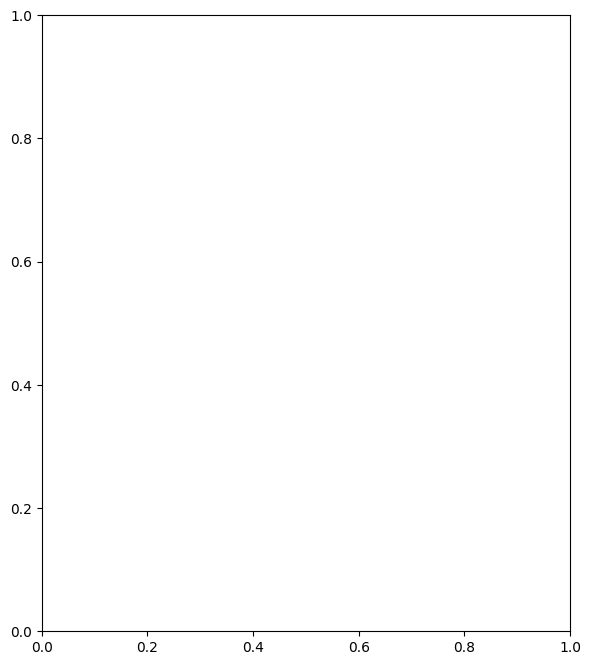

In [38]:
epochs_range = range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='upper right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,1)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')

In [39]:
model.evaluated(X_test,y_test)

NameError: name 'model' is not defined

In [40]:
y_pred = model.predict(X_test)


NameError: name 'model' is not defined

In [41]:
y_pred

NameError: name 'y_pred' is not defined